In [3]:
import matplotlib.pyplot as plt
from digiPath.utils.pim_patch_sampler import *
from digiPath.pim import PIM

plt.rcParams['figure.figsize'] = [15, 10]

In [4]:
case_id, page_size = 1321, 3
pimObj = PIM(case_id, page_size)
#pimObj.readHE()
#pimObj.showHE()
#pimObj.drawConsensusROIs()
#plt.show()
# pimObj.readFGmask()
# img_he = pimObj.HE.pim
# img_mask = pimObj.FGmask.pmask.astype(bool)

In [10]:
import numpy as np
consy    = pimObj.ConsensusROIs[1]
img_he   = consy.readFrom(pimObj.HE.path)
img_rgb  = consy.readFrom(pimObj.RGB.path)
img_mask = consy.readFrom(pimObj.FGmask.path).astype(bool)

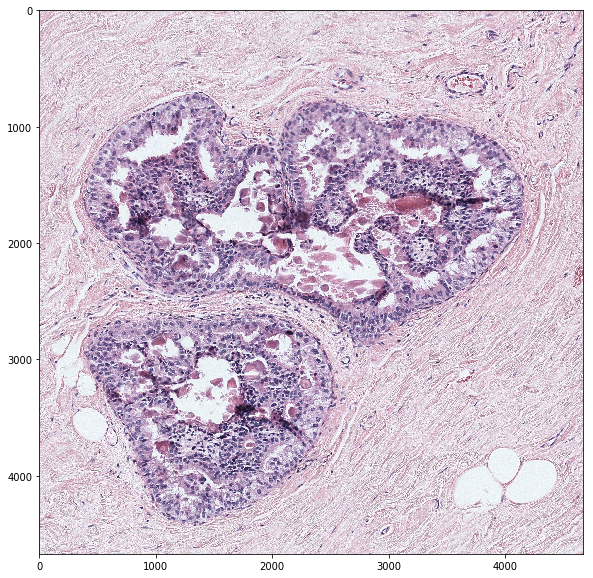

In [11]:
plt.imshow(img_rgb)
plt.show()

In [13]:
win_size = (224, 224) # (224, 224) for AlexNet
offset = tuple(w//2 for w in win_size)

poi_idx, poi_region = getNucleiPOIs(img_he[:,:,0], pimObj.page, offset)
patch_iter = cropPatchfromImage(1000, poi_idx, win_size, img_he, img_mask)
# patch_iter = consy.crop(consy.RGB.path, (50,50), 200)

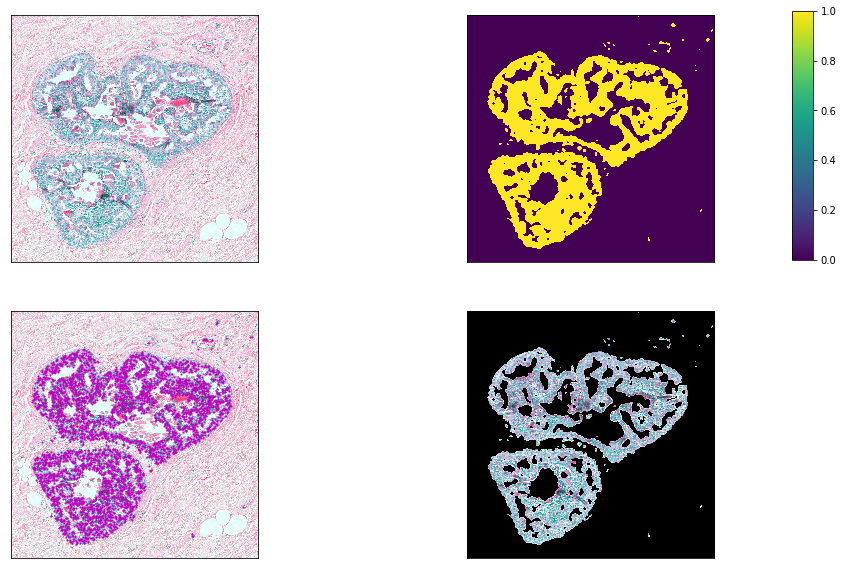

In [18]:
figs, axs = plt.subplots(2,2)
img  = axs[0][0].imshow(img_he)
filt = axs[0][1].imshow(poi_region)

sidx = np.random.randint(0, len(poi_idx[0]), 5000)
axs[1][0].imshow(img_he)
axs[1][0].scatter(poi_idx[1,sidx], poi_idx[0,sidx], s=1, c='m')
img_aux = img_he.copy()
img_aux[~poi_region] = 0
axs[1][1].imshow(img_aux)
for ax_arr in axs:
    for ax in ax_arr:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
figs.subplots_adjust(right=0.9)
cbar_ax = figs.add_axes([0.91, 0.54, 0.02, 0.345])
figs.colorbar(filt, cax=cbar_ax)
plt.show()

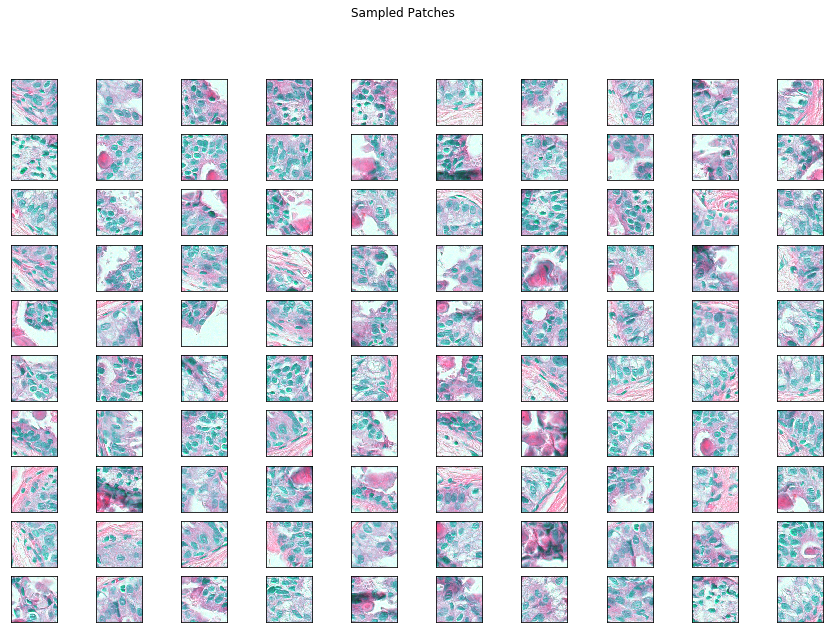

In [19]:
fig, axs_nd = plt.subplots(10, 10)
for ax_arr in axs_nd:
    for ax in ax_arr:
        ax.imshow(next(patch_iter))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.suptitle('Sampled Patches')
plt.show()